##  Sports Analytics

You’re a data scientist for a sports analytics company.
Your task is to help the coaching staff predict whether a soccer player’s match performance will be above or below average based on their match statistics.

## Business Question:

“Can we predict if a player will perform well (Above Average) using match stats like shots, passes, and tackles?”

## Goal:

Classify players as Above Average (1) or Below Average (0)

Understand which factors most influence good performance

Help coaches focus training on impactful metrics

## Success Criteria:

Model accuracy ≥ 80%

Interpretability (understand why a player performs well)

In [34]:
# import libraries to use in the notebook

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [35]:
# Data Understanding  
# Create a dataframe (dataset) to simulate the soccer performance stats

data = {
    'shots_on_target': [2, 5, 1, 7, 3, 8, 0, 6, 4, 2, 9, 5, 6, 7, 2],
    'passes_completed': [30, 55, 25, 70, 40, 75, 20, 65, 50, 35, 80, 60, 72, 77, 32],
    'tackles_won': [1, 3, 0, 4, 2, 5, 1, 4, 3, 1, 5, 2, 4, 4, 1],
    'performance': [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]
}


# read dataset 
df = pd.DataFrame(data) 
df.head()



,shots_on_target,passes_completed,tackles_won,performance
0,2,30,1,0
1,5,55,3,1
2,1,25,0,0
3,7,70,4,1
4,3,40,2,0


In [36]:
# Inspect data 
df.info() # Checks for number of rows, datatypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   shots_on_target   15 non-null     int64
 1   passes_completed  15 non-null     int64
 2   tackles_won       15 non-null     int64
 3   performance       15 non-null     int64
dtypes: int64(4)
memory usage: 612.0 bytes


In [37]:
df.describe() # gives stats of data mean,median,standard dev


,shots_on_target,passes_completed,tackles_won,performance
count,15.000000,15.00000,15.000000,15.000000
mean,4.466667,52.40000,2.666667,0.600000
std,2.722044,20.65983,1.632993,0.507093
min,0.000000,20.00000,0.000000,0.000000
25%,2.000000,33.50000,1.000000,0.000000
50%,5.000000,55.00000,3.000000,1.000000
75%,6.500000,71.00000,4.000000,1.000000
max,9.000000,80.00000,5.000000,1.000000


In [38]:
df.isnull().sum() 

shots_on_target     0
passes_completed    0
tackles_won         0
performance         0
dtype: int64

In [39]:
# Check for imbalance between 0 and 1 in performance feature
df['performance'].value_counts()

performance
1    9
0    6
Name: count, dtype: int64

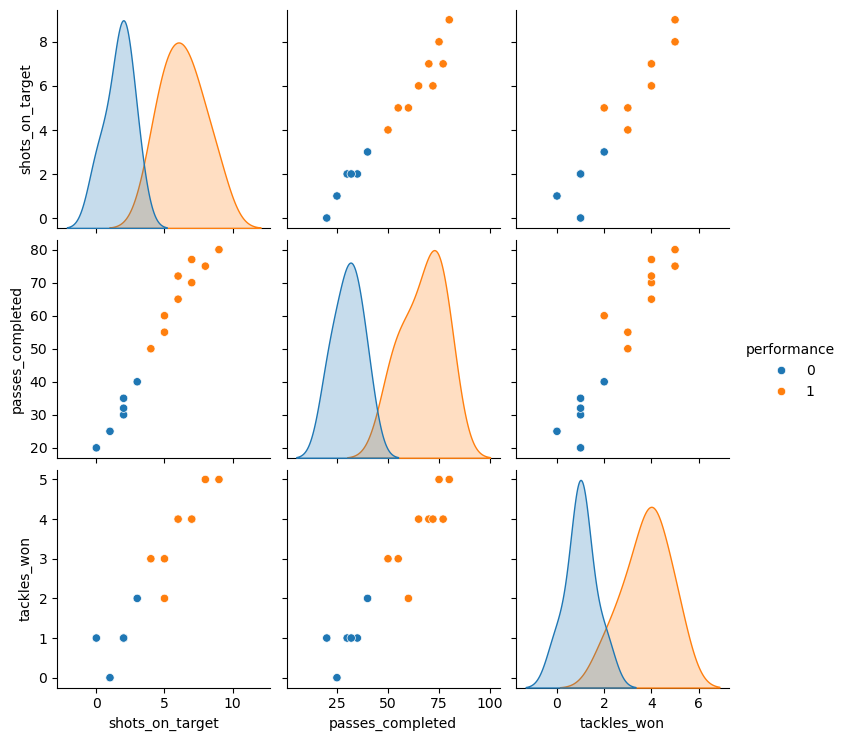

In [40]:
# Understand the performance relation
# see how each feature is affecting the performance

sns.pairplot(df,hue='performance')
plt.show()

In [41]:
# Data Preparation 
# Split feature (x) and target(y) 
# test_size = .30 is 30% of data for testing 
X = df[['shots_on_target', 'passes_completed','tackles_won']]
Y = df['performance']

# model view
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [42]:
# modeling the data 
# Initial and train a logistic regression model-> we are using simoid function to predict output probabilities between 0 and 1
model = LogisticRegression()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

In [43]:
# Evaluation 

print("Accuracy:", accuracy_score(Y_test, Y_pred)) # Accuracy measure
print(confusion_matrix(Y_test,Y_pred)) # shows correct and incorrect classifications
print(classification_report(Y_test, Y_pred)) # adds precision, recall, f1 score
      

Accuracy: 1.0
[[2 0]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [45]:

coef_table = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds_Ratio': np.exp(model.coef_[0])
})
coef_table


,Feature,Coefficient,Odds_Ratio
0,shots_on_target,0.058228,1.059957
1,passes_completed,0.566011,1.761227
2,tackles_won,0.055228,1.056781


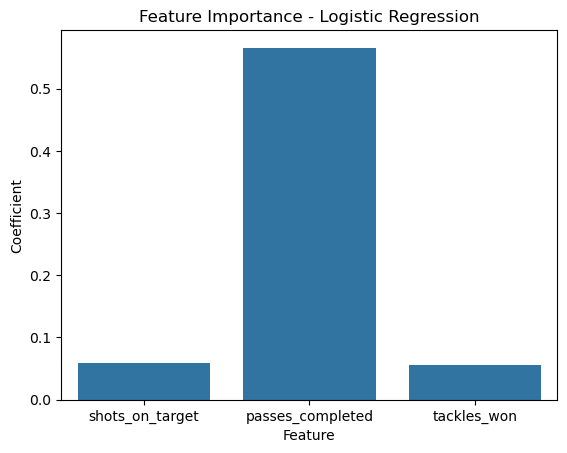

In [47]:
#Conclusion
sns.barplot(x=coef_table['Feature'], y=coef_table['Coefficient'])
plt.title("Feature Importance - Logistic Regression")
plt.show()


### Key Insights

| Feature | Impact | Interpretation |
|----------|---------|----------------|
| **Passes Completed** |  Highest positive impact | Players completing more passes tend to perform above average — consistency and teamwork matter most. |
| **Shots on Target** | Positive impact | Accurate shooters are more likely to perform better overall. |
| **Tackles Won** | Moderate impact | Defensive ability contributes but is less influential than passing or shooting accuracy. |

**Interpretation:**  
Passing accuracy is the strongest predictor of high performance, followed by shooting accuracy. Defensive metrics add value but play a smaller role.